<a href="https://colab.research.google.com/github/deblina0/Sales-Prediction/blob/main/Sales_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

- **Description:** Develop a regression model to predict future sales based
on historical data. This helps in forecasting and planning for inventory,
marketing, and budgeting.
- **Why:** Accurate sales predictions enable better decision-making and
resource allocation.
- **Tasks:**

    ▪ Gather historical sales data.

    ▪ Preprocess data (handling missing values, encoding categorical
    variables).

    ▪ Example datasets Click Here

    ▪ Train regression models (e.g., linear regression, random forest).

    ▪ Evaluate model performance and make predictions.

**Using Google Colab**

In [26]:
from google.colab import files
uploaded = files.upload()


Saving BigMart Sales Data.csv to BigMart Sales Data (1).csv


**Import Necessary Libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [28]:
BigMart = pd.read_csv('BigMart Sales Data.csv')

**First five count from dataset**

In [29]:
BigMart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Check the data type of the columns**

In [30]:
BigMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Checking the null values**

In [31]:
BigMart.isnull().sum().sum()

3873

In [32]:
BigMart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


As the count of null values are high so we are filling it with `mean` value and for categorical column filling with `mode` value

In [33]:
BigMart['Item_Weight'].fillna(BigMart['Item_Weight'].mean(),inplace = True)

In [34]:
BigMart['Outlet_Size'].fillna(BigMart['Outlet_Size'].mode()[0],inplace = True)

In [35]:
BigMart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**Checking the duplicate value**

In [36]:
BigMart.duplicated().sum()

0

**Checking the outliers**

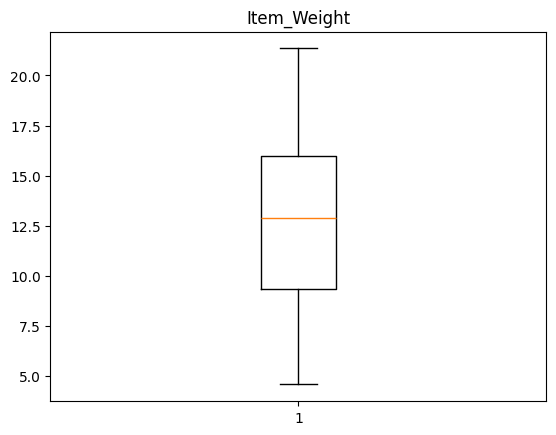

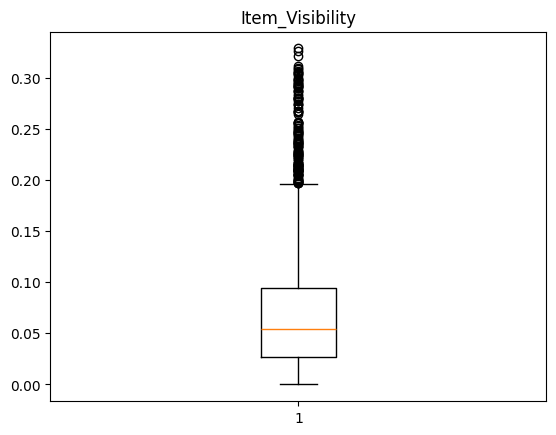

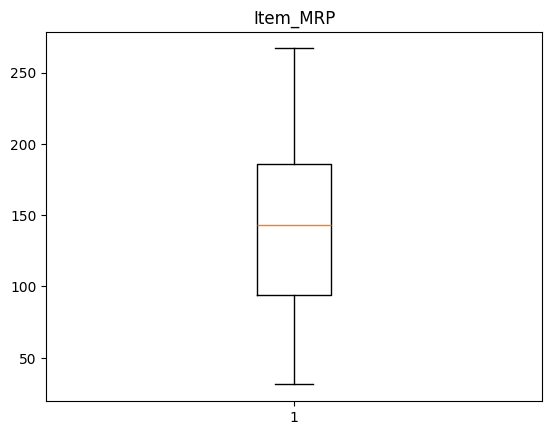

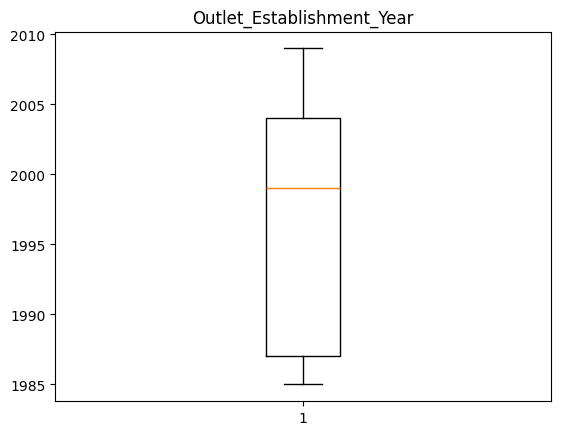

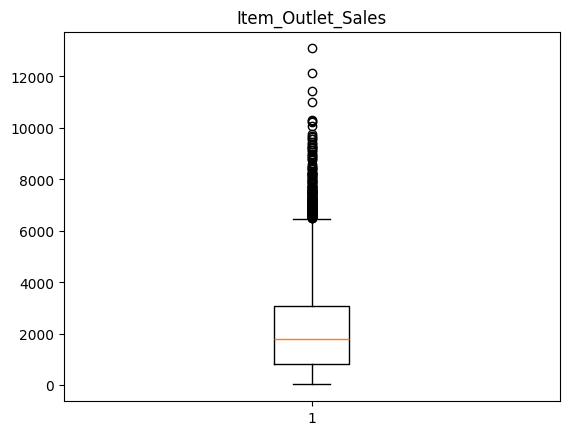

In [37]:
for i in BigMart.columns:
  if BigMart[i].dtype!= 'object':
    plt.boxplot(BigMart[i])
    plt.title(i)
    plt.show()

As outlier is present for 2 columns so we are treating them with `IQR method`

In [38]:
# IQR method
out_cols = ['Item_Visibility', 'Item_Outlet_Sales']

for i in out_cols:
  Q1 = BigMart[i].quantile(0.25)
  Q3 = BigMart[i].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3+1.5*IQR
  lower_limit = Q1-1.5*IQR
  BigMart = BigMart[(BigMart[i]>= lower_limit) & (BigMart[i]<=upper_limit)]

**Checking again after treating**

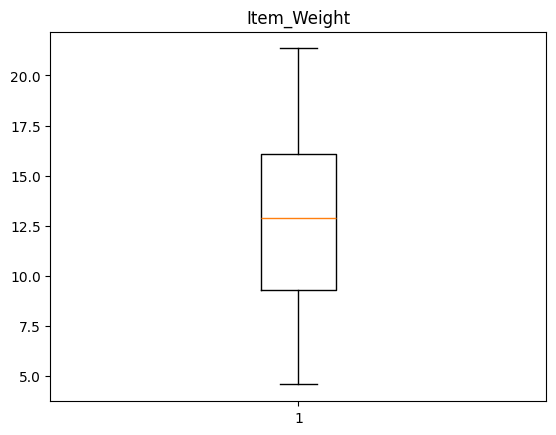

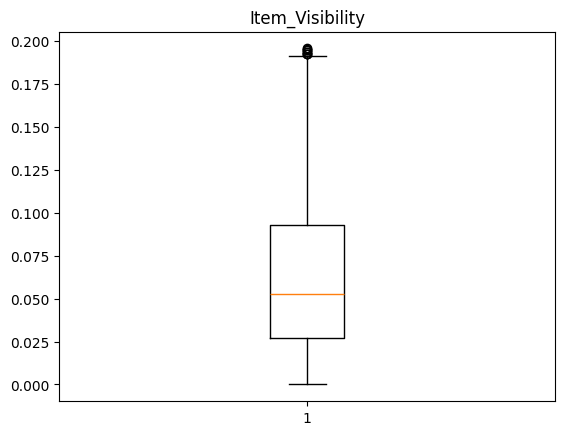

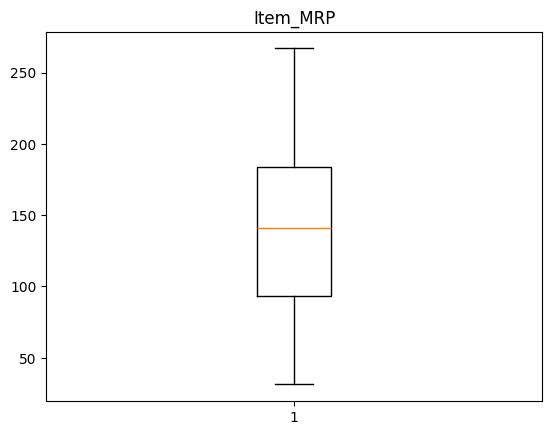

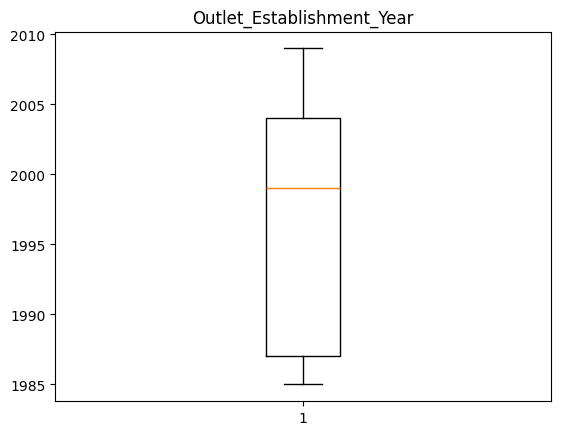

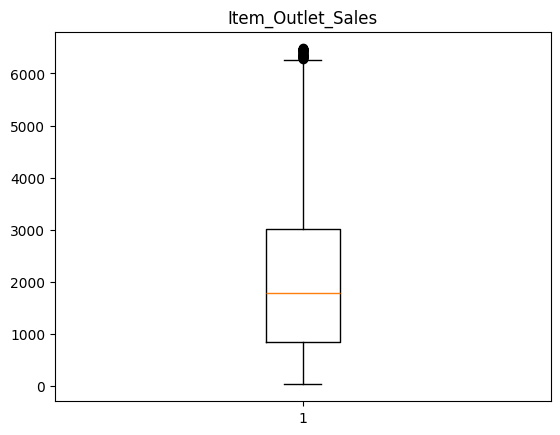

In [39]:
for i in BigMart.columns:
  if BigMart[i].dtype!= 'object':
    plt.boxplot(BigMart[i])
    plt.title(i)
    plt.show()

In [40]:
BigMart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
BigMart['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,512
0.076975,3
0.162462,2
0.156802,2
0.026950,2
...,...
0.128806,1
0.112162,1
0.083359,1


In [42]:
BigMart['Item_Outlet_Sales'].value_counts()

,count
Item_Outlet_Sales,
958.7520,17
1342.2528,16
703.0848,15
1845.5976,15
1278.3360,14
...,...
221.7114,1
637.1706,1
238.3564,1


In [43]:
BigMart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8193 non-null   object 
 1   Item_Weight                8193 non-null   float64
 2   Item_Fat_Content           8193 non-null   object 
 3   Item_Visibility            8193 non-null   float64
 4   Item_Type                  8193 non-null   object 
 5   Item_MRP                   8193 non-null   float64
 6   Outlet_Identifier          8193 non-null   object 
 7   Outlet_Establishment_Year  8193 non-null   int64  
 8   Outlet_Size                8193 non-null   object 
 9   Outlet_Location_Type       8193 non-null   object 
 10  Outlet_Type                8193 non-null   object 
 11  Item_Outlet_Sales          8193 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 832.1+ KB


We are applying `One-hot`encoding

In [44]:
col_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

BigMart_encoded= pd.get_dummies(BigMart,columns = col_encode, drop_first = True)

print(BigMart_encoded.head())

  Item_Identifier  Item_Weight  Item_Visibility  Item_MRP Outlet_Identifier  \
0           FDA15         9.30         0.016047  249.8092            OUT049   
1           DRC01         5.92         0.019278   48.2692            OUT018   
2           FDN15        17.50         0.016760  141.6180            OUT049   
3           FDX07        19.20         0.000000  182.0950            OUT010   
4           NCD19         8.93         0.000000   53.8614            OUT013   

   Outlet_Establishment_Year  Item_Outlet_Sales  Item_Fat_Content_Low Fat  \
0                       1999          3735.1380                      True   
1                       2009           443.4228                     False   
2                       1999          2097.2700                      True   
3                       1998           732.3800                     False   
4                       1987           994.7052                      True   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  ...  \


Encoded columns

In [45]:
BigMart_encoded.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

As these columns are not needed so we are dropping them

In [46]:
BigMart_encoded.drop(columns = 'Item_Identifier', axis = 1, inplace = True)

In [47]:
BigMart_encoded.drop(columns = 'Outlet_Identifier', axis = 1, inplace = True)

In [48]:
BigMart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,True,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [49]:
BigMart_encoded.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000,-0.007557,0.026178,-0.009335,0.010881,0.023236,-0.021814,-0.004633,-0.003380,-0.050135,...,0.011615,-0.046452,0.025252,-0.006547,-0.001697,-0.016035,0.012573,-0.004435,-0.000608,-0.000495
Item_Visibility,-0.007557,1.000000,0.001426,-0.034039,-0.071907,-0.040087,0.047348,-0.011363,0.005902,0.005130,...,0.007993,-0.011099,-0.001447,-0.015062,0.032962,-0.033004,0.005789,-0.075447,-0.017547,-0.029687
Item_MRP,0.026178,0.001426,1.000000,0.027364,0.564361,-0.006187,0.011735,-0.011741,-0.007454,0.000506,...,0.035542,-0.039484,0.013608,-0.018272,0.016419,0.006402,-0.012408,0.017770,0.013478,-0.047107
Outlet_Establishment_Year,-0.009335,-0.034039,0.027364,1.000000,-0.009663,0.001490,-0.002224,-0.023820,0.018491,-0.006152,...,0.003789,0.008513,0.010097,0.352387,-0.049398,0.533231,-0.333178,0.211469,0.469712,-0.531074
Item_Outlet_Sales,0.010881,-0.071907,0.564361,-0.009663,1.000000,-0.024219,0.030512,-0.005389,-0.013322,0.001341,...,0.025268,-0.032474,0.018546,0.051530,-0.077271,0.072139,0.010974,0.145584,-0.025973,0.243029
Item_Fat_Content_Low Fat,0.023236,-0.040087,-0.006187,0.001490,-0.024219,1.000000,-0.871131,-0.140251,-0.145472,-0.033336,...,-0.052875,0.080692,-0.029101,-0.001916,0.003311,0.007573,-0.008861,0.005161,-0.006285,-0.007740
Item_Fat_Content_Regular,-0.021814,0.047348,0.011735,-0.002224,0.030512,-0.871131,1.000000,-0.082191,-0.085251,0.032327,...,0.061552,-0.091209,0.014030,0.000626,-0.000152,-0.002395,-0.000883,0.002840,-0.001324,0.006670
Item_Fat_Content_low fat,-0.004633,-0.011363,-0.011741,-0.023820,-0.005389,-0.140251,-0.082191,1.000000,-0.013725,0.018030,...,0.002871,0.001983,-0.006787,-0.002605,-0.009210,-0.001817,0.008181,-0.006385,-0.010464,0.011155
Item_Fat_Content_reg,-0.003380,0.005902,-0.007454,0.018491,-0.013322,-0.145472,-0.085251,-0.013725,1.000000,-0.002432,...,0.020287,-0.023349,0.040563,0.012640,-0.014050,-0.005439,0.001315,0.001859,0.016446,-0.019504
Item_Type_Breads,-0.050135,0.005130,0.000506,-0.006152,0.001341,-0.033336,0.032327,0.018030,-0.002432,1.000000,...,-0.070639,-0.040959,-0.022919,0.003810,-0.000792,0.001586,0.005335,-0.009769,-0.000734,0.010561


*HeatMap* visually represents the correlation between columns in dataset.
- +1 positive correlation
- -1 negative correlation
- 0 no correlation

Here we can see the `strong relationship `between **'Item_Outlet_Sales' & 'Item_MRP'**
It means high MRP tends to `high` sales of outlet.

we can see `negative co-relation` between **'Item_Outlet_Sales' & 'Item_Visibility'**
It means if things are not visible properly , sales will `decrease`.

<Axes: >

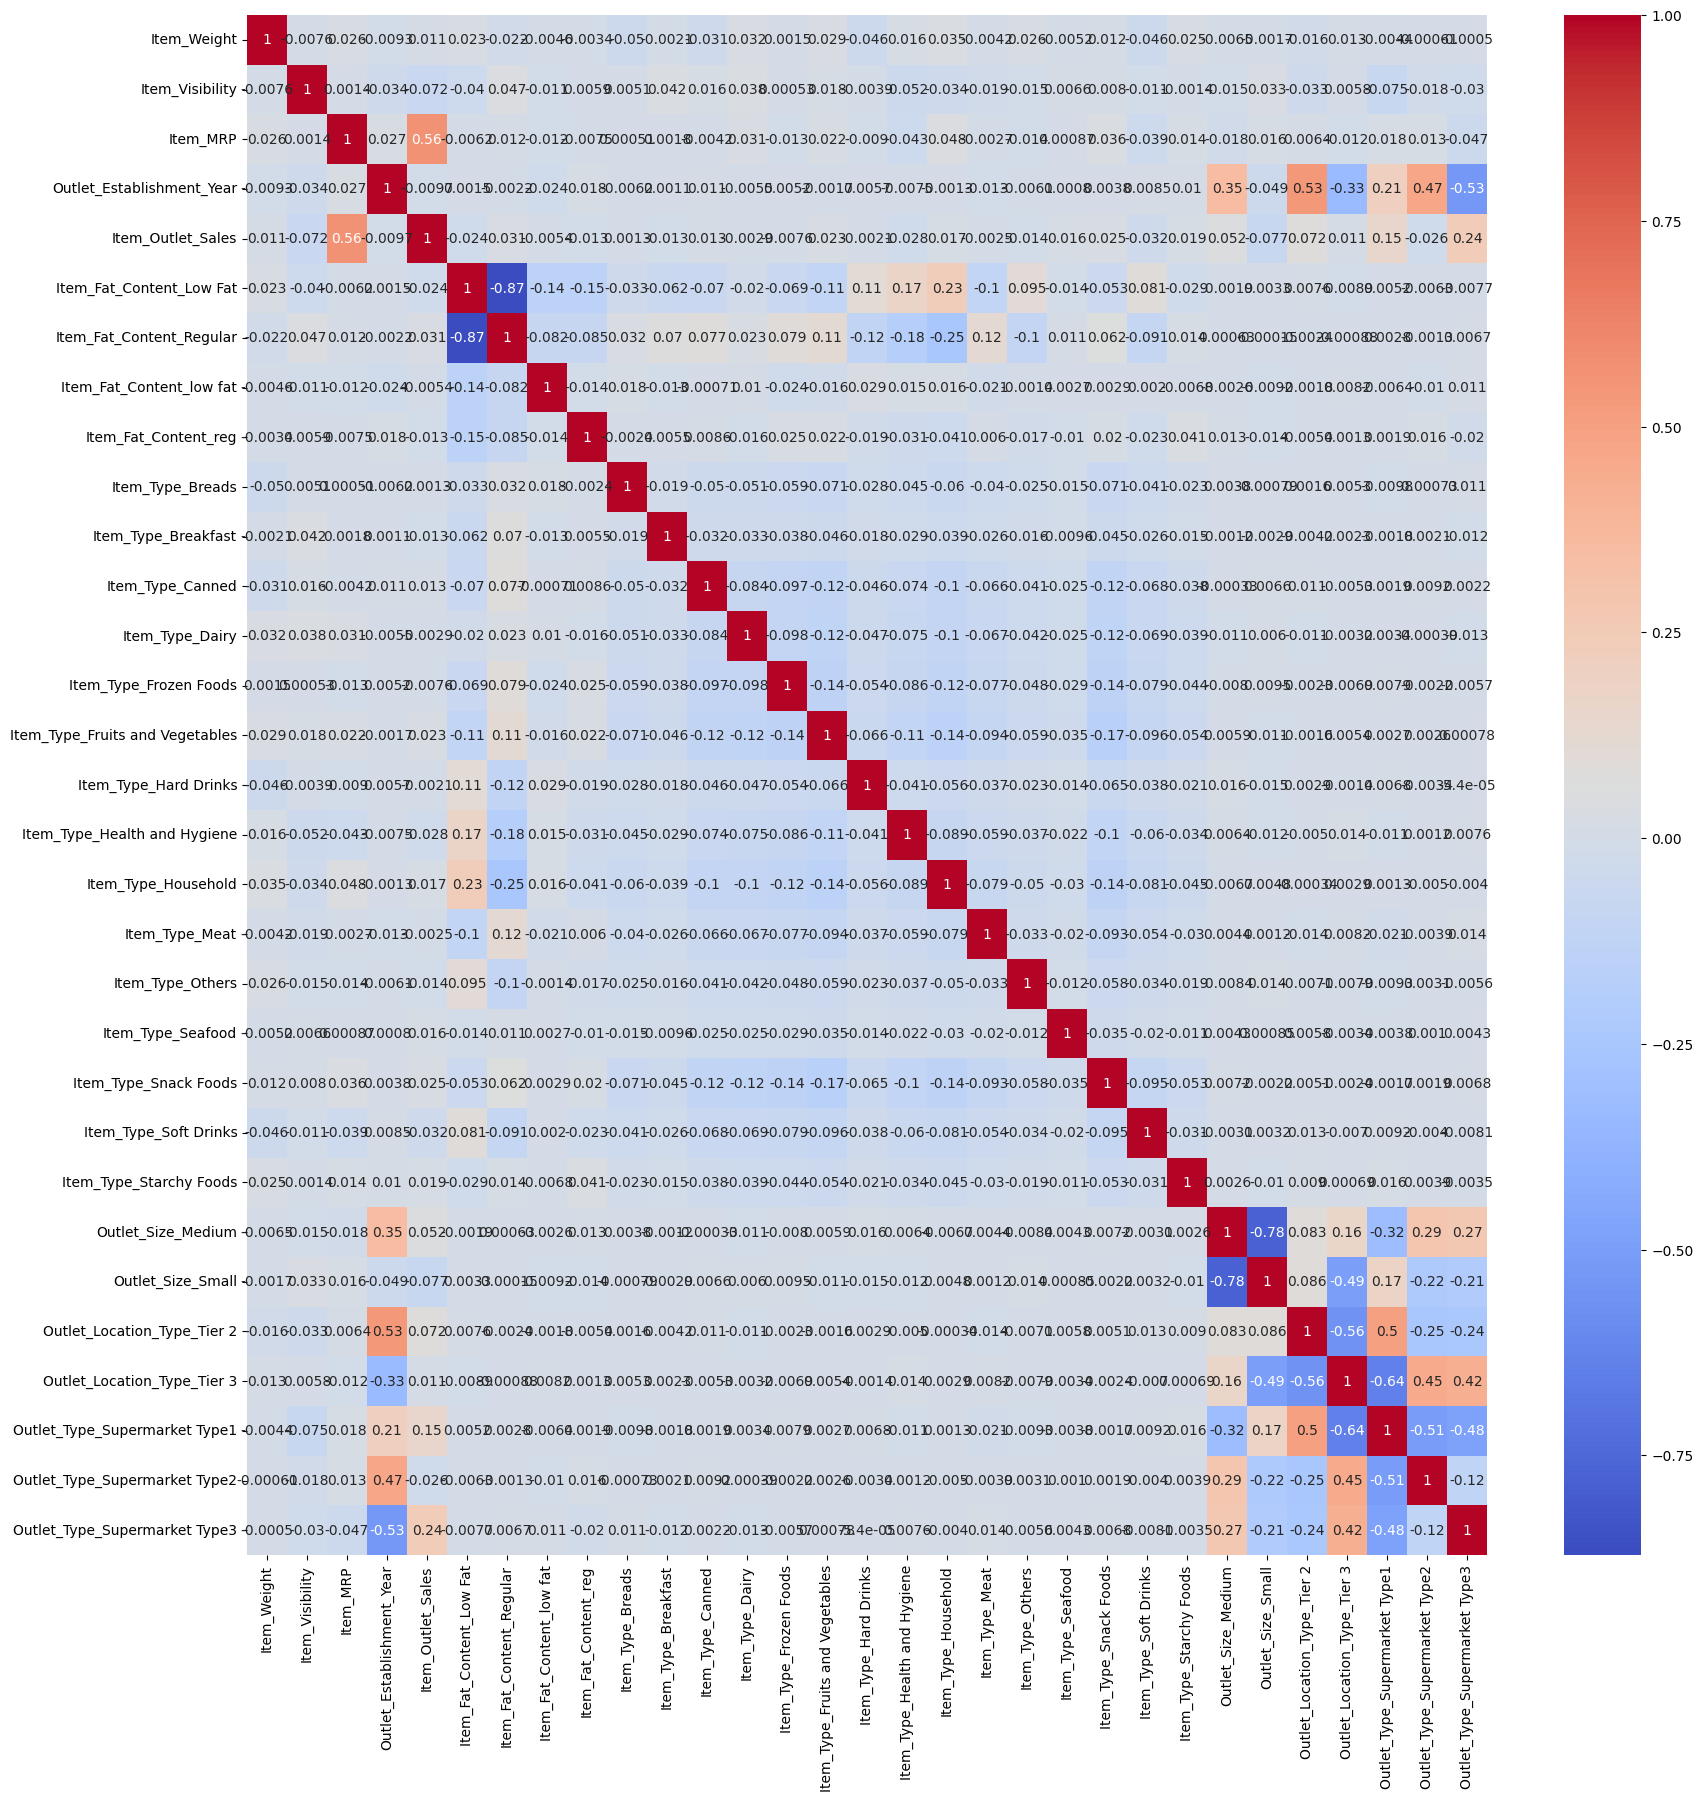

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(BigMart_encoded.corr(), annot=True, cmap= 'coolwarm')

###Splitting the into dependent and independent variables

In [51]:
X = BigMart_encoded.drop('Item_Outlet_Sales', axis = 1)

In [52]:
y = BigMart_encoded['Item_Outlet_Sales']

In [53]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,True,False
2,17.500,0.016760,141.6180,1999,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,8.930,0.000000,53.8614,1987,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,True,False,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
8519,8.380,0.046982,108.1570,2002,False,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
8520,10.600,0.035186,85.1224,2004,True,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
8521,7.210,0.145221,103.1332,2009,False,True,False,False,False,False,...,True,False,False,True,False,False,True,False,True,False


In [54]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


Spliting the dataset

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 42)

In [56]:
x_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1365,12.600000,0.041558,124.5072,1997,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
7666,12.857645,0.114475,160.9236,1985,True,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,True
2381,9.600000,0.000000,244.8170,2004,True,False,False,False,False,False,...,True,False,False,False,True,True,False,True,False,False
8385,11.600000,0.037734,98.1042,2009,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
3242,13.500000,0.017896,79.4960,2002,False,False,False,True,False,False,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,12.857645,0.024213,42.4454,1985,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
5608,20.850000,0.121439,196.1452,1999,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
896,16.200000,0.128683,178.4370,2002,False,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
7911,17.850000,0.052258,121.8072,1999,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False


In [57]:
y_train

,Item_Outlet_Sales
1365,2450.1440
7666,2255.7304
2381,4374.3060
8385,2678.5134
3242,1597.9200
...,...
5437,293.6178
5608,1565.9616
896,1058.6220
7911,2450.1440


In [58]:
x_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
5904,6.235000,0.020198,257.9962,1997,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
6009,7.725000,0.047978,249.5092,2009,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2202,20.100000,0.054540,152.1366,1999,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
6927,10.500000,0.048009,157.0946,2004,True,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
5439,15.000000,0.054686,60.2904,2007,False,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,12.857645,0.191014,42.1112,1985,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
6304,17.700000,0.116724,182.4266,1999,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
141,9.195000,0.048332,105.1622,2007,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
3812,9.600000,0.006693,164.9184,1987,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [59]:
y_test

,Item_Outlet_Sales
5904,517.9924
6009,2241.0828
2202,755.6830
6927,2209.1244
5439,1581.9408
...,...
178,42.6112
6304,5163.9448
141,1693.7952
3812,2972.1312


Applying Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
Lr_model = LinearRegression()

In [61]:
Lr_model.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred = Lr_model.predict(x_test)
y_pred

array([3903.45117523, 3631.29568055, 2474.29765182, ..., 1782.81783574,
       2574.10657157, 3303.59824307])

In [63]:
from sklearn.metrics import *

In [64]:
r2_score(y_test,y_pred)

0.5476788692103345

In [65]:
# y_train_pred = Lr_model.predict(x_train)
# r2_score(y_train,y_train_pred)

In [66]:
np.sqrt(mean_squared_error(y_test,y_pred))

1015.7415611510653

In [67]:
mean_squared_error(y_test,y_pred)

1031730.9190496033

Applying Random Forest algorithm for better model performance

In [68]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_model = RandomForestRegressor(n_estimators=50,random_state= 100)

In [70]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=100)

In [71]:
y_pred_rf = rf_model.predict(x_test)

In [72]:
r2_score(y_test, y_pred_rf)

0.5145364917439313

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred_rf))

1052.2963874303518

Applying Hyperparameter Tuning to the model

In [74]:
# #Using GridSearchCV
# from sklearn.model_selection import GridSearchCV
# from scipy.stats import randint

# # Define the parameter grid with lists or numpy arrays for each hyperparameter
# param_grid = {
#     'n_estimators': randint.rvs(100, 500, size=5), # Generate 5 random values between 100 and 500
#     'max_depth': randint.rvs(5, 30, size=5), # Generate 5 random values between 5 and 30
#     'min_samples_split': randint.rvs(2, 11, size=5), # Generate 5 random values between 2 and 11
#     'min_samples_leaf': randint.rvs(1, 5, size=5), # Generate 5 random values between 1 and 5
#     'max_features': ['sqrt', 'log2', 'auto', None]
# }


# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(x_train, y_train)
# best_params = grid_search.best_params_
# best_rf_model = grid_search.best_estimator_
# y_pred_best = best_rf_model.predict(x_test)
# r2_best = r2_score(y_test, y_pred_best)

In [75]:
# using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# define a parameter grid with list or numpy arrays for each hyperparameter
param_grid = {
    'n_estimators' : randint(100, 500), # Number of trees in RF
    'max_depth' : randint(5, 30), # maximum depth of the tree
    'min_samples_split' : randint(2, 11), # Minimum number of samples required to split an internal node
    'min_samples_leaf' : randint(1, 5), # minimum number of samples required to be at a leaf node
    'max_features' : ['sqrt', 'log2', 'auto', None] # Number of features to consider when looking for the best split

    }

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator = rf_model,
                                   param_distributions=param_grid,
                                   n_iter = 8,  # Number of parameter settings that are sampled
                                   cv =5, # Number of folds in cross validation,
                                   n_jobs=-1, # Use all available cores for parallel processing
                                   random_state=42) #set random state for reproducibility

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# get the best hyperparameters and the best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Evaluate the model with best hyperparameters
y_pred_best = best_rf_model.predict(x_test)
r2_best = r2_score(y_test, y_pred_best)
print("Best Hyperparameters: \n", best_params)
print("R-squared: ", r2_best)


Best Hyperparameters: 
 {'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 485}
R-squared:  0.5789735744602937
